In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

In [64]:
data = pd.read_csv('temp1.csv')
data
# perhaps make basement binary and use sqft_living instead of sqft_above

,price,bedrooms,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,bathroomsx4,floorsx2
0,221900.0,3,5650,0,0,3,7,1180,0,1955,98178,4,2
1,538000.0,3,7242,0,0,3,7,2170,400,1951,98125,9,4
2,180000.0,2,10000,0,0,3,6,770,0,1933,98028,4,2
3,604000.0,4,5000,0,0,5,7,1050,910,1965,98136,12,2
4,510000.0,3,8080,0,0,3,8,1680,0,1987,98074,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19044,360000.0,3,1131,0,0,3,8,1530,0,2009,98103,10,6
19045,400000.0,4,5813,0,0,3,8,2310,0,2014,98146,10,4
19046,402101.0,2,1350,0,0,3,7,1020,0,2009,98144,3,4
19047,400000.0,3,2388,0,0,3,8,1600,0,2004,98027,10,4


In [65]:
zipcode_dummies = pd.get_dummies(data['zipcode'], prefix='zip', drop_first=True)
data = data.drop(['zipcode'], axis=1)
data = pd.concat([data, zipcode_dummies], axis=1)

In [66]:
bedrooms_dummies = pd.get_dummies(data['bedrooms'], prefix='bed', drop_first=True)
data = data.drop(['bedrooms'], axis=1)
data = pd.concat([data, bedrooms_dummies], axis=1)

In [67]:
view_dummies = pd.get_dummies(data['view'], prefix='view', drop_first=True)
data = data.drop(['view'], axis=1)
data = pd.concat([data, view_dummies], axis=1)

In [68]:
condition_dummies = pd.get_dummies(data['condition'], prefix='cond', drop_first=True)
data = data.drop(['condition'], axis=1)
data = pd.concat([data, condition_dummies], axis=1)

In [69]:
grade_dummies = pd.get_dummies(data['grade'], prefix='gra', drop_first=True)
data = data.drop(['grade'], axis=1)
data = pd.concat([data, grade_dummies], axis=1)

In [70]:
# perform log transform
log_transform = ['price', 'sqft_lot', 'sqft_above']
for feat in log_transform:
    data[feat] = data[feat].map(lambda x: np.log(x))

In [71]:
outcome = 'price'
x_cols = list(data.columns)
x_cols.remove(outcome)

In [72]:
y = data[['price']]
X = data.drop(['price'], axis=1)

train, test = train_test_split(data, test_size=0.2, random_state=42)

In [73]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     881.8
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:54:54   Log-Likelihood:                 5016.8
No. Observations:               15239   AIC:                            -9844.
Df Residuals:                   15144   BIC:                            -9119.
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.3603      0.199     47.058      0.000       8.970       9.750
sqft_lot          0.0512      0.003     16.728      0.000       0.045       0.057
waterfront        0.4013      0.033     12.277      0.000       0.337       0.465
sqft_above        0.4353      0.008     55.143      0.000       0.420       0.451
sqft_basement     0.0002   5.21e-06     30.979      0.000       0.000       0.000
yr_built         -0.0005   8.66e-05     -6.260      0.000      -0.001      -0.000
bathroomsx4       0.0116      0.001     12.627      0.000       0.010       0.013
floorsx2         -0.0131      0.002     -5.845      0.000      -0.018      -0.009
zip_98002        -0.0416      0.018     -2.362      0.018      -0.076      -0.007
zip_98003         0.0033      0.016      0.203      0.839      -0.028       0.035
zip_98004         1.0731      0.019     57.511      0.000       1.036       1.110
zip_98005         0.7420      0.020     37.511      0.000       0.703       0.781
zip_98006         0.6545      0.015     44.032      0.000       0.625       0.684
zip_98007         0.6674      0.021     31.570      0.000       0.626       0.709
zip_98008         0.6423      0.016     39.617      0.000       0.611       0.674
zip_98010         0.2409      0.024      9.885      0.000       0.193       0.289
zip_98011         0.4606      0.018     25.357      0.000       0.425       0.496
zip_98014         0.2508      0.025      9.954      0.000       0.201       0.300
zip_98019         0.3263      0.019     17.276      0.000       0.289       0.363
zip_98022         0.0070      0.019      0.367      0.713      -0.030       0.045
zip_98023        -0.0243      0.014     -1.749      0.080      -0.051       0.003
zip_98024         0.3616      0.031     11.480      0.000       0.300       0.423
zip_98027         0.5530      0.015     36.552      0.000       0.523       0.583
zip_98028         0.4230      0.016     25.993      0.000       0.391       0.455
zip_98029         0.6112      0.016     38.397      0.000       0.580       0.642
zip_98030         0.0477      0.016      2.957      0.003       0.016       0.079
zip_98031         0.0721      0.016      4.517      0.000       0.041       0.103
zip_98032        -0.0298      0.021     -1.436      0.151      -0.071       0.011
zip_98033         0.7738      0.015     51.666      0.000       0.744       0.803
zip_98034         0.5305      0.014     38.447      0.000       0.503       0.558
zip_98038         0.1649      0.014     12.130      0.000       0.138       0.192
zip_98039         1.2281      0.059     20.722      0.000       1.112       1.344
zip_98040         0.8935      0.019     48.237      0.000       0.857       0.930
zip_98042         0.0639      0.014      4.635      0.000       0.037       0.091
zip_98045         0.3193      0.018     17.935   

In [74]:
y_train = train[['price']]
X_train = train.drop(['price'], axis=1)
y_test = test[['price']]
X_test = test.drop(['price'], axis=1)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [75]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [76]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)
print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)

Train Mean Squarred Error: 0.03030935714212865
Test Mean Squarred Error: 0.029652517681479078
Train Root Mean Squarred Error: 0.17409582746903687
Test Root Mean Squarred Error: 0.1721990641132497


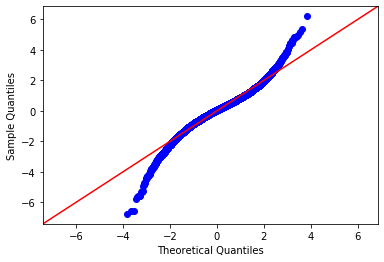

In [77]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

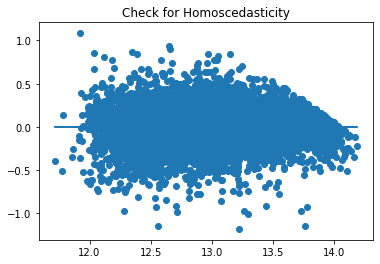

In [78]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

plt.title('Check for Homoscedasticity');

In [79]:
data.columns

Index(['price', 'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement',
       'yr_built', 'bathroomsx4', 'floorsx2', 'zip_98002', 'zip_98003',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022',
       'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034',
       'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058',
       'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074',
       'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103',
       'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118',
       'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133',
       'zip_98136', 'zip_98144', 'zip_98146', 'zip_98148', 'zip

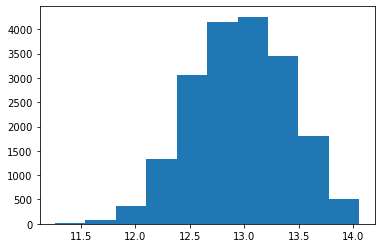

In [80]:
plt.hist(data.price);

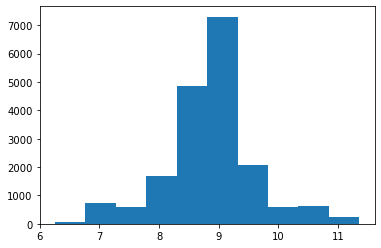

In [61]:
plt.hist(data.sqft_lot);

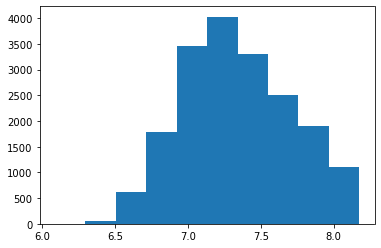

In [62]:
plt.hist(data.sqft_above);

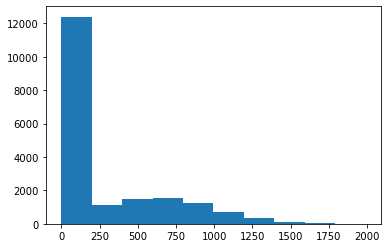

In [81]:
plt.hist(data.sqft_basement);

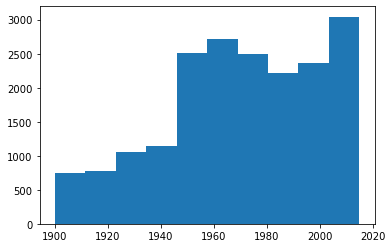

In [82]:
plt.hist(data.yr_built);